In [31]:
import Bio
import Levenshtein
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils import molecular_weight
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
read_file1 = SeqIO.read("x.fasta", "fasta")
print(read_file1)

read_file2 = SeqIO.read("y.fasta", "fasta")
print(read_file2)

ID: XM_006779407.2
Name: XM_006779407.2
Description: XM_006779407.2 PREDICTED: Myotis davidii seryl-tRNA synthetase (SARS), mRNA
Number of features: 0
Seq('ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGC...TCA')
ID: OV986001.1
Name: OV986001.1
Description: OV986001.1 Pseudomonas fluorescens SBW25 genome assembly, chromosome: 1
Number of features: 0
Seq('GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCT...GAC')


In [33]:
seqX = read_file1.seq
print(seqX)

seqY = read_file2.seq
print(seqY)


ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGNNNNNNNNNNNNNNNNNNCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTTCGCCAGGAGGTGGGCTCCCACGGCCGGGACACCCGCGGCATCTTCCGAGTCCATCAGTTTGAGAAGATCGAGCAGTTTGTCTACGCGTCAC

In [34]:
# Display the total length of Sequence X and Y.
print(len(seqX))
print(len(seqY))

1883
1050


Counter({'G': 524, 'C': 515, 'A': 462, 'T': 364})


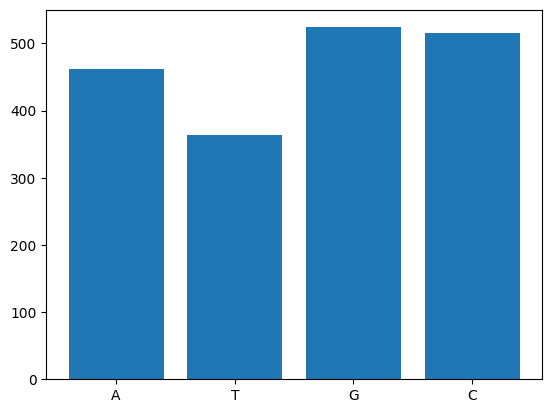

In [35]:
seqX = seqX.replace("N", "")
freq_seqX = Counter(seqX)

bases = ["A", "T", "G", "C"]
values = [freq_seqX[x] for x in bases]

print(freq_seqX)
plt.bar(bases, values)
plt.show()

Counter({'C': 315, 'G': 286, 'A': 234, 'T': 215})

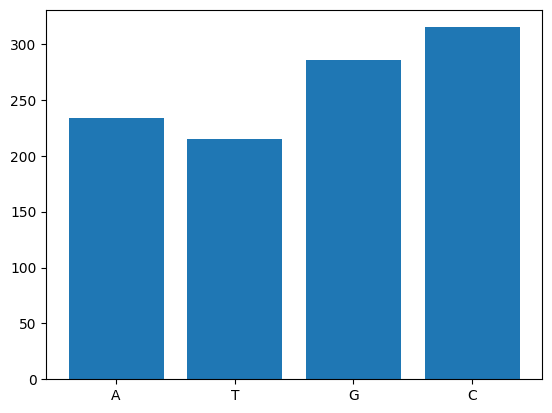

In [36]:
seqY = seqY.replace("N", "")
freq_seqY = Counter(seqY)

bases = ["A", "T", "G", "C"]
values = [freq_seqY[x] for x in bases]

print(freq_seqY)
plt.bar(bases, values)
plt.show()

In [37]:
# Display which index the first time the codon (CGC) appears in Sequence X and Y.
print(seqX.find("CGC"))
print(seqY.find("CGC"))
# print(seqX.index("CGC"))
# print(seqY.index("CGC"))

51
39


In [38]:
# Take the first 10 nucleotides from Sequence X and the last 5 nucleotides from Sequence X.
X = seqX[:10] + seqX[-5:]
print(X)

# Take the first 10 nucleotides from Sequence X and the last 5 nucleotides from Sequence X.
Y = seqY[:20] + seqY[-3:]
print(Y)

# Combine both of the string above and reverse it to a new sequence, Sequence Z.
Z = X + Y
Z = Z[::-1]
print(Z)

ATGGTGTTGGAGTCA
GTGTCAGTGGAACTTTGGCAGAC
CAGACGGTTTCAAGGTGACTGTGACTGAGGTTGTGGTA


Counter({'G': 14, 'T': 11, 'A': 8, 'C': 5})


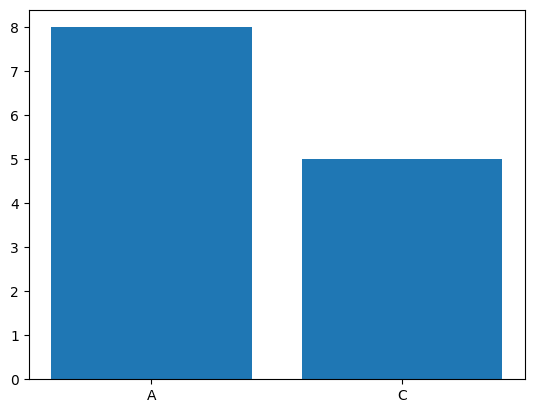

In [39]:
# Display the nucleotides base (A and C) frequency for Sequence Z with a chart using matplotlib library. 
# You are free to plot using bar or pie chart.
freq = Counter(Z)

bases = ["A", "C"]
values = [freq[x] for x in bases]

print(freq)
plt.bar(bases, values)
plt.show()

GC Percentage X:  46.666666666666664
AT Percentage X:  53.333333333333336


<BarContainer object of 1 artists>

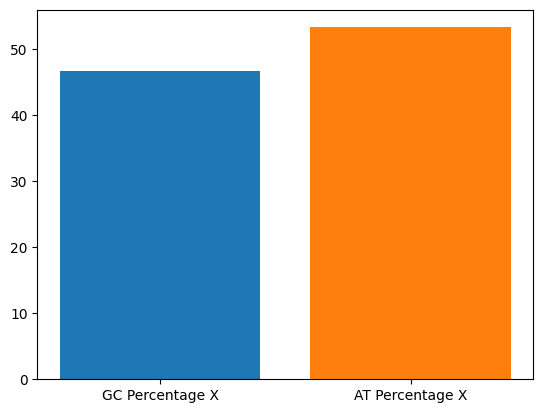

In [40]:
GC_percentage = gc_fraction(X) * 100
AT_percentage = 100 - GC_percentage

print("GC Percentage X: ", GC_percentage)
print("AT Percentage X: ", AT_percentage)

plt.bar("GC Percentage X", GC_percentage)
plt.bar("AT Percentage X", AT_percentage)

GC Percentage Y:  52.17391304347826
AT Percentage Y:  47.82608695652174


<BarContainer object of 1 artists>

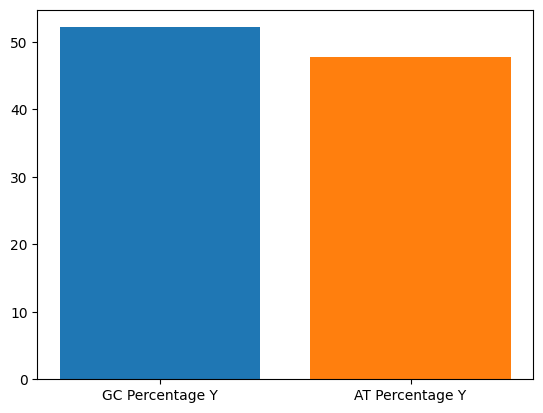

In [41]:
GC_percentage = gc_fraction(Y) * 100
AT_percentage = 100 - GC_percentage

print("GC Percentage Y: ", GC_percentage)
print("AT Percentage Y: ", AT_percentage)

plt.bar("GC Percentage Y", GC_percentage)
plt.bar("AT Percentage Y", AT_percentage)

GC Percentage Z:  50.0
AT Percentage Z:  50.0


<BarContainer object of 1 artists>

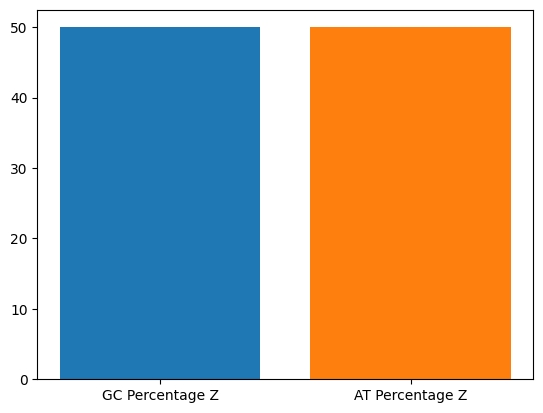

In [42]:
# Display GC and AT content percentage for Sequence Z.
GC_percentage = gc_fraction(Z) * 100
AT_percentage = 100 - GC_percentage

print("GC Percentage Z: ", GC_percentage)
print("AT Percentage Z: ", AT_percentage)

plt.bar("GC Percentage Z", GC_percentage)
plt.bar("AT Percentage Z", AT_percentage)

In [43]:
# Display melting temperature for Sequence Z using Wallace method.
mtwallace_Z = MeltingTemp.Tm_Wallace(Z)
print("Melting Temp Wallace Z: ", mtwallace_Z)

Melting Temp Wallace Z:  114.0


Melting Temp Wallace X:  44.0
Melting Temp Wallace Y:  70.0
Melting Temp Wallace Z:  114.0


<BarContainer object of 1 artists>

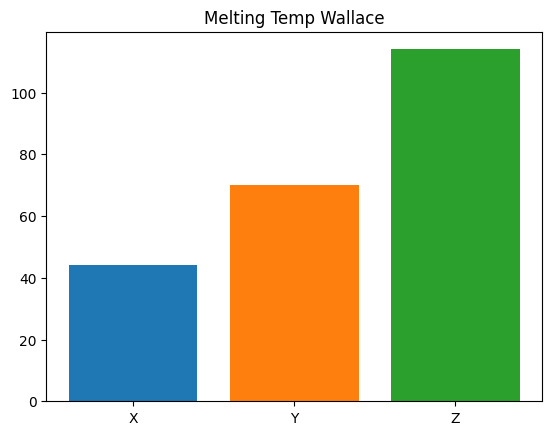

In [44]:
mtwallace_X = MeltingTemp.Tm_Wallace(X)
mtwallace_Y = MeltingTemp.Tm_Wallace(Y)
mtwallace_Z = MeltingTemp.Tm_Wallace(Z)

print("Melting Temp Wallace X: ", mtwallace_X)
print("Melting Temp Wallace Y: ", mtwallace_Y)
print("Melting Temp Wallace Z: ", mtwallace_Z)

plt.title("Melting Temp Wallace")
plt.bar("X", mtwallace_X)
plt.bar("Y", mtwallace_Y)
plt.bar("Z", mtwallace_Z)

Melting Temp GC X:  39.03623540531123
Melting Temp GC Y:  55.20724989806487
Melting Temp GC Z:  64.61342838776739


<BarContainer object of 1 artists>

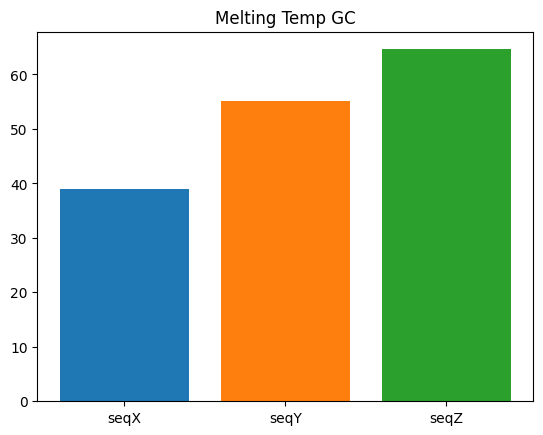

In [45]:
mtgc_X = MeltingTemp.Tm_GC(X)
mtgc_Y = MeltingTemp.Tm_GC(Y)
mtgc_Z = MeltingTemp.Tm_GC(Z)

print("Melting Temp GC X: ", mtgc_X)
print("Melting Temp GC Y: ", mtgc_Y)
print("Melting Temp GC Z: ", mtgc_Z)

plt.title("Melting Temp GC")
plt.bar("seqX", mtgc_X)
plt.bar("seqY", mtgc_Y)
plt.bar("seqZ", mtgc_Z)

In [46]:
# Display molecular weight for Sequence Z.
mw_Z = molecular_weight(Z)
print(mw_Z)

11924.5841


4743.018
7199.5814
11924.5841


<BarContainer object of 1 artists>

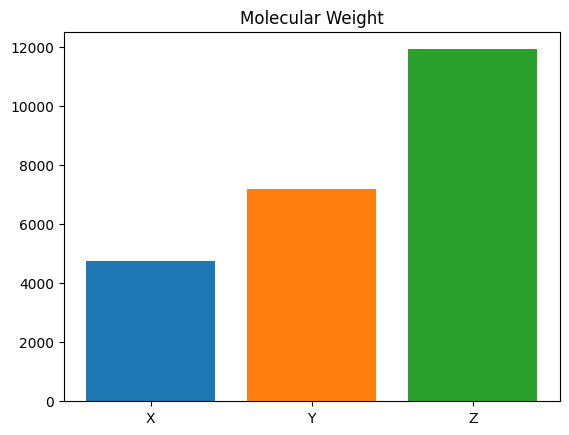

In [47]:
mw_X = molecular_weight(X)
mw_Y = molecular_weight(Y)
mw_Z = molecular_weight(Z)

print(mw_X)
print(mw_Y)
print(mw_Z)

plt.title("Molecular Weight")
plt.bar("X", mw_X)
plt.bar("Y", mw_Y)
plt.bar("Z", mw_Z)

In [48]:
# Transcribe and display the DNA sequence Z into mRNA Sequence.
Z_rna = Z.transcribe()
print(Z_rna)

CAGACGGUUUCAAGGUGACUGUGACUGAGGUUGUGGUA


In [49]:
X_rna = X.transcribe()
print(X_rna)

Y_rna = Y.transcribe()
print(Y_rna)

Z_rna = Z.transcribe()
print(Z_rna)

AUGGUGUUGGAGUCA
GUGUCAGUGGAACUUUGGCAGAC
CAGACGGUUUCAAGGUGACUGUGACUGAGGUUGUGGUA


In [50]:
# Translate and display the mRNA sequence Z into amino acids Sequence.
Z_mrna = Z_rna.translate()
print(Z_mrna)

QTVSR*L*LRLW


In [51]:
X_mrna = X_rna.translate()
print(X_mrna)

Y_mrna = Y_rna.translate()
print(Y_mrna)

Z_mrna = Z_rna.translate()
print(Z_mrna)

MVLES
VSVELWQ
QTVSR*L*LRLW


In [52]:
# Perform local alignment pairwise between sequence X and sequence Y and display the alignment score.
alignments_local = pairwise2.align.localxx(X, Y)
for alignment in alignments_local:
    print(format_alignment(*alignment))

2 TG---GTG----TT-GG-AGTCA
  ||   |||    || || ||  |
2 TGTCAGTGGAACTTTGGCAG--A
  Score=12

2 TG---GT-G---TT-GG-AGTCA
  ||   || |   || || ||  |
2 TGTCAGTGGAACTTTGGCAG--A
  Score=12

2 TG---GTG----T-TGG-AGTCA
  ||   |||    | ||| ||  |
2 TGTCAGTGGAACTTTGGCAG--A
  Score=12

2 TG---GT-G---T-TGG-AGTCA
  ||   || |   | ||| ||  |
2 TGTCAGTGGAACTTTGGCAG--A
  Score=12

2 TG---GTG-----TTGG-AGTCA
  ||   |||     |||| ||  |
2 TGTCAGTGGAACTTTGGCAG--A
  Score=12

2 TG---GT-G----TTGG-AGTCA
  ||   || |    |||| ||  |
2 TGTCAGTGGAACTTTGGCAG--A
  Score=12

1 A-TGG---TGTTGG-AGTCA
  | |||   | |||| ||  |
6 AGTGGAACT-TTGGCAG--A
  Score=12

2 TG---GTG----TT-GG-AGT-C
  ||   |||    || || ||  |
2 TGTCAGTGGAACTTTGGCAG-AC
  Score=12

2 TG---GT-G---TT-GG-AGT-C
  ||   || |   || || ||  |
2 TGTCAGTGGAACTTTGGCAG-AC
  Score=12

2 TG---GTG----T-TGG-AGT-C
  ||   |||    | ||| ||  |
2 TGTCAGTGGAACTTTGGCAG-AC
  Score=12

2 TG---GT-G---T-TGG-AGT-C
  ||   || |   | ||| ||  |
2 TGTCAGTGGAACTTTGGCAG-AC
  Score=12

2 TG---GTG-----TTGG

In [53]:
# Perform global alignment pairwise between sequence Y and sequence Z and display the alignment score
alignments_global = pairwise2.align.globalxx(Y, Z)
for alignment in alignments_global:
    print(format_alignment(*alignment))

--GT--G-T--CA-GTG-GA-----ACT----TTG-GCAG-AC
  |   | |  || | | ||     |||    ||| |  | | 
CAG-ACGGTTTCAAG-GTGACTGTGACTGAGGTTGTG--GTA-
  Score=18

--GT-G-T--CA-GTG-GA-----ACT----TTG-GCAG-AC
  |. | |  || | | ||     |||    ||| |  | | 
CAGACGGTTTCAAG-GTGACTGTGACTGAGGTTGTG--GTA-
  Score=18

--G-TG-T--CA-GTG-GA-----ACT----TTG-GCAG-AC
  | .| |  || | | ||     |||    ||| |  | | 
CAGACGGTTTCAAG-GTGACTGTGACTGAGGTTGTG--GTA-
  Score=18

--GT---GT--CA-GTG-GA-----ACT----TTG-GCAG-AC
  |    ||  || | | ||     |||    ||| |  | | 
CAG-ACGGTTTCAAG-GTGACTGTGACTGAGGTTGTG--GTA-
  Score=18

--GT--GT--CA-GTG-GA-----ACT----TTG-GCAG-AC
  |.  ||  || | | ||     |||    ||| |  | | 
CAGACGGTTTCAAG-GTGACTGTGACTGAGGTTGTG--GTA-
  Score=18

--G-T-GT--CA-GTG-GA-----ACT----TTG-GCAG-AC
  | . ||  || | | ||     |||    ||| |  | | 
CAGACGGTTTCAAG-GTGACTGTGACTGAGGTTGTG--GTA-
  Score=18

--G--TGT--CA-GTG-GA-----ACT----TTG-GCAG-AC
  |  .||  || | | ||     |||    ||| |  | | 
CAGACGGTTTCAAG-GTGACTGTGACTGAGGTTGTG--GTA-
  Score=18

-----GT

In [54]:
# Find and display the Hamming and Levenshtein distance between Sequence X and Y
def hamming_distance(seq1, seq2):
    count = 0
    for i, j in zip(seq1, seq2):
        if (i != j):
            count += 1
    return count

print(hamming_distance(X, Y))

levenshtein_distance = Levenshtein.distance(X, Y)
print(levenshtein_distance)

9
12


In [55]:
def plot(seq1, seq2):
    print(' |' + seq2)
    print('-' * (len(seq2) + 3))
    for i in seq1:
        print(i + '|', end= '')
        for j in seq2:
            if (i == j):
                print('#', end= '')
            else:
                print('.', end= '')
        print('')

In [56]:
plot(X, Y)

 |GTGTCAGTGGAACTTTGGCAGAC
--------------------------
A|.....#....##.......#.#.
T|.#.#...#.....###.......
G|#.#...#.##......##..#..
G|#.#...#.##......##..#..
T|.#.#...#.....###.......
G|#.#...#.##......##..#..
T|.#.#...#.....###.......
T|.#.#...#.....###.......
G|#.#...#.##......##..#..
G|#.#...#.##......##..#..
A|.....#....##.......#.#.
G|#.#...#.##......##..#..
T|.#.#...#.....###.......
C|....#.......#.....#...#
A|.....#....##.......#.#.
